## Cleaning data of dataset Auto market 2023

### The dataset was downloaded from kaggle: https://www.kaggle.com/datasets/wspirat/germany-used-cars-dataset-2023/discussion?sort=hotness 


### About Dataset
Description:
Collection of car offers from one of Germany's largest car sales websites, AutoScout24. This scraped dataset contains a wide range of information about car offers, covering a cars manufactured from 1995 to 2023.

Features:

Brand: The brand or manufacturer of the car.
Model: The specific model of the car.
Color: The color of the car's exterior.
Registration Date: The date when the car was registered (Month/Year).
Year of Production: The year in which the car was manufactured.
Price in Euro: The price of the car in Euros.
Power: The power of the car in kilowatts (kW) and horsepower (ps).
Transmission Type: The type of transmission (e.g., automatic, manual).
Fuel Type: The type of fuel the car requires.
Fuel Consumption: Information about the car's fuel consumption in L/100km ang g/km.
Mileage: The total distance traveled by the car in km.
Offer Description: Additional description provided in the car offer.


In [62]:
#Importing the necessary libraries:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
from datetime import datetime
import scipy.stats as stats

%matplotlib inline


In [85]:
df = pd.read_csv("./Downloads/data_auto_2023.csv", index_col=0)

df.info()

print('We can see a lot of type object for some variables , which could be integers and floats')

<class 'pandas.core.frame.DataFrame'>
Index: 251079 entries, 0 to 251078
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     251079 non-null  object 
 1   model                     251079 non-null  object 
 2   color                     250913 non-null  object 
 3   registration_date         251075 non-null  object 
 4   year                      251079 non-null  object 
 5   price_in_euro             251079 non-null  object 
 6   power_kw                  250945 non-null  object 
 7   power_ps                  250950 non-null  object 
 8   transmission_type         251079 non-null  object 
 9   fuel_type                 251079 non-null  object 
 10  fuel_consumption_l_100km  224206 non-null  object 
 11  fuel_consumption_g_km     251079 non-null  object 
 12  mileage_in_km             250927 non-null  float64
 13  offer_description         251078 non-null  object

In [86]:
df.head(6)

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"
5,alfa-romeo,Alfa Romeo Spider,red,04/1996,1996,7900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,47307.0,2.0 16V Twin Spark


In [87]:
#duplicated rows?
n_rows_duplicated = df.duplicated().sum()

print("Number of duplicated rows:", n_rows_duplicated)
df.drop_duplicates(inplace=True)

Number of duplicated rows: 6353


### I have to change the types of some variables:

In [88]:
df['price_in_euro'] = pd.to_numeric(df['price_in_euro'], errors='coerce')
df['price_in_euro'].unique()

array([ 1300., 24900.,  5900., ..., 81350., 89690., 61521.])

In [89]:
df['power_ps'] = pd.to_numeric(df['power_ps'], errors='coerce')
df['year'] = pd.to_numeric(df['year'], errors='coerce')


df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244726 entries, 0 to 251078
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     244726 non-null  object 
 1   model                     244726 non-null  object 
 2   color                     244642 non-null  object 
 3   registration_date         244722 non-null  object 
 4   year                      244546 non-null  float64
 5   price_in_euro             244542 non-null  float64
 6   power_kw                  244593 non-null  object 
 7   power_ps                  244519 non-null  float64
 8   transmission_type         244726 non-null  object 
 9   fuel_type                 244726 non-null  object 
 10  fuel_consumption_l_100km  218134 non-null  object 
 11  fuel_consumption_g_km     244726 non-null  object 
 12  mileage_in_km             244585 non-null  float64
 13  offer_description         244725 non-null  object

In [90]:
df['fuel_consumption_l_100km'].unique()

array(['10,9 l/100 km', nan, '9,5 l/100 km', '7,2 l/100 km',
       '8,8 l/100 km', '13,4 l/100 km', '11 l/100 km', '9,2 l/100 km',
       '11,1 l/100 km', '11,7 l/100 km', '8,4 l/100 km', '8,2 l/100 km',
       '8,9 l/100 km', '11,4 l/100 km', '8,5 l/100 km', '8,3 l/100 km',
       '7,9 l/100 km', '8,7 l/100 km', '8,1 l/100 km', '12,2 l/100 km',
       '12 l/100 km', '5,8 l/100 km', '10 l/100 km', '6,7 l/100 km',
       '8,6 l/100 km', '12,5 l/100 km', '9,7 l/100 km', '12,1 l/100 km',
       '8 l/100 km', '7,5 l/100 km', '6,2 l/100 km', '13,2 l/100 km',
       '6 l/100 km', '12,4 l/100 km', '6,8 l/100 km', '9,4 l/100 km',
       '6,1 l/100 km', '5,9 l/100 km', '11,5 l/100 km', '11,6 l/100 km',
       '7,6 l/100 km', '5,2 l/100 km', '7,1 l/100 km', '6,9 l/100 km',
       '12,3 l/100 km', '6,5 l/100 km', '7,7 l/100 km', '4,6 l/100 km',
       '4,8 l/100 km', '4,5 l/100 km', '5,3 l/100 km', '6,4 l/100 km',
       '4,9 l/100 km', '6,6 l/100 km', '5,5 l/100 km', '5,4 l/100 km',
       '5,6

## I see in the data for fuel_consumption_l_100km, is a mess, with l/100km there are kWh/100km (electric cars) and kg/100km (gas cars), this I can accept. But there are things like g/km , or km(Ort) or Petrol or Automatic, or year . This happened probably due to scraping. This has to be cleaned.

In [91]:
#to see whether kg/100km belong to gas cars:
df_gas=df.loc[(df['fuel_type']=='LNG') | (df['fuel_type']=='Hydrogen') | (df['fuel_type']=='CNG')]
df_gas.head(20)

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
9864,audi,Audi A3,blue,01/2015,2015.0,20930.0,81,110.0,Automatic,CNG,5 kg/100 km,115 g/km,98674.0,1.4 TFSI g-tron S-tronic S-Line GRA
10844,audi,Audi A3,silver,07/2015,2015.0,17200.0,110,150.0,Automatic,CNG,"4,6 kg/100 km",- (g/km),80000.0,1.4 TFSI cylinder on demand ultra Limousine At...
11169,audi,Audi A3,white,03/2015,2015.0,13990.0,81,110.0,Automatic,CNG,5 kg/100 km,115 g/km,133000.0,Ambiente Sportback Erdgas CNG
11825,audi,Audi A3,grey,10/2016,2016.0,16950.0,81,110.0,Manual,CNG,"3,6 kg/100 km",98 g/km,82880.0,1.4TFSI g-tron 2x S line/Sportback/VOLL/CNG
12034,audi,Audi A3,black,12/2016,2016.0,15950.0,81,110.0,Automatic,CNG,"5,4 kg/100 km",128 g/km,78500.0,Sportback g-tron*AHK*Erdgas*Automatik
12455,audi,Audi A3,silver,10/2016,2016.0,15999.0,81,110.0,Automatic,CNG,5 kg/100 km,115 g/km,92634.0,G-tron Sportback Navi Xenon Sitzh ACC HIFI*
12674,audi,Audi A3,white,11/2016,2016.0,17970.0,81,110.0,Automatic,CNG,"5,4 kg/100 km",123 g/km,95947.0,Sportback g-tron 1.4 TFSI Navi Pano Apple CarPlay
12956,audi,Audi A4,blue,12/2017,2017.0,16980.0,125,170.0,Automatic,CNG,6 kg/100 km,137 g/km,165000.0,Avant g-tron*S-TRONIC*LED*NAVI*AHK*1.HAND*
13078,audi,Audi A3,blue,09/2017,2017.0,18990.0,81,110.0,Automatic,CNG,NaN,- (g/km),77790.0,Sportback g-tron design Navi Xen AHK-schwenkb
13213,audi,Audi A3,yellow,12/2017,2017.0,21999.0,81,110.0,Automatic,CNG,"5,4 kg/100 km",124 g/km,56003.0,Sportback g-tron design S Line Matrix+B&O+AHK


In [92]:
df.drop(df.loc[df['fuel_consumption_l_100km'] == 'Diesel'].index, inplace=True)
df.drop(df.loc[df['fuel_consumption_l_100km'] == 'Petrol'].index, inplace=True)
df.drop(df.loc[df['fuel_consumption_l_100km'] == 'Manual'].index, inplace=True)
df.drop(df.loc[df['fuel_consumption_l_100km'] == 'Electric'].index, inplace=True)
df.drop(df.loc[df['fuel_consumption_l_100km'] == 'Hybrid'].index, inplace=True)
df.drop(df.loc[df['fuel_consumption_l_100km'] == 'Automatic'].index, inplace=True)
df.drop(df.loc[df['fuel_consumption_l_100km'].str.contains(' g/km', na=False)].index, inplace=True)
df.drop(df.loc[df['fuel_consumption_l_100km'].str.contains('Ort', na=False)].index, inplace=True)
#df.drop(df.loc[df['fuel_consumption_l_100km'].str.contains('/', na=False)].index, inplace=True)
#df.drop(df.loc[df['fuel_consumption_l_100km'].str.contains('km', na=False)].index, inplace=True)
df.drop(df.loc[df['fuel_consumption_l_100km'] == '2012'].index, inplace=True)
df.drop(df.loc[df['fuel_consumption_l_100km'] == '2003'].index, inplace=True)
df.drop(df.loc[df['fuel_consumption_l_100km'] == '2006'].index, inplace=True)
df.drop(df.loc[df['fuel_consumption_l_100km'] == '2007'].index, inplace=True)
df.drop(df.loc[df['fuel_consumption_l_100km'] == '2010'].index, inplace=True)
df.drop(df.loc[df['fuel_consumption_l_100km'] == '2015'].index, inplace=True)
df.drop(df.loc[df['fuel_consumption_l_100km'] == '2020'].index, inplace=True)
df.drop(df.loc[df['fuel_consumption_l_100km'] == '2023'].index, inplace=True)
df.drop(df.loc[df['fuel_consumption_l_100km'] == '2013'].index, inplace=True)
df.drop(df.loc[df['fuel_consumption_l_100km'] == '2022'].index, inplace=True)
df.drop(df.loc[df['fuel_consumption_l_100km'] == '2019'].index, inplace=True)
df.drop(df.loc[df['fuel_consumption_l_100km'].str.contains('2016', na=False)].index, inplace=True)
df.drop(df.loc[df['fuel_consumption_l_100km'].str.contains('2009', na=False)].index, inplace=True)
df.drop(df.loc[df['fuel_consumption_l_100km'].str.contains('2014', na=False)].index, inplace=True)
df.drop(df.loc[df['fuel_consumption_l_100km'].str.contains('2017', na=False)].index, inplace=True)
df.drop(df.loc[df['fuel_consumption_l_100km'].str.contains('2018', na=False)].index, inplace=True)
df.drop(df.loc[df['fuel_consumption_l_100km'].str.contains('2022', na=False)].index, inplace=True)
df.drop(df.loc[df['fuel_consumption_l_100km'].str.contains('2019', na=False)].index, inplace=True)
df.drop(df.loc[df['fuel_consumption_l_100km'].str.contains('2020', na=False)].index, inplace=True)
df.drop(df.loc[df['fuel_consumption_l_100km'].str.contains('2021', na=False)].index, inplace=True)
df.drop(df.loc[df['fuel_consumption_l_100km'].str.contains('Reichweite', na=False)].index, inplace=True)

df['fuel_consumption_l_100km'].unique()

#however it is important to notice that here included not only l/ 100km
#but kWh/ 100m for electric auto

array(['10,9 l/100 km', nan, '9,5 l/100 km', '7,2 l/100 km',
       '8,8 l/100 km', '13,4 l/100 km', '11 l/100 km', '9,2 l/100 km',
       '11,1 l/100 km', '11,7 l/100 km', '8,4 l/100 km', '8,2 l/100 km',
       '8,9 l/100 km', '11,4 l/100 km', '8,5 l/100 km', '8,3 l/100 km',
       '7,9 l/100 km', '8,7 l/100 km', '8,1 l/100 km', '12,2 l/100 km',
       '12 l/100 km', '5,8 l/100 km', '10 l/100 km', '6,7 l/100 km',
       '8,6 l/100 km', '12,5 l/100 km', '9,7 l/100 km', '12,1 l/100 km',
       '8 l/100 km', '7,5 l/100 km', '6,2 l/100 km', '13,2 l/100 km',
       '6 l/100 km', '12,4 l/100 km', '6,8 l/100 km', '9,4 l/100 km',
       '6,1 l/100 km', '5,9 l/100 km', '11,5 l/100 km', '11,6 l/100 km',
       '7,6 l/100 km', '5,2 l/100 km', '7,1 l/100 km', '6,9 l/100 km',
       '12,3 l/100 km', '6,5 l/100 km', '7,7 l/100 km', '4,6 l/100 km',
       '4,8 l/100 km', '4,5 l/100 km', '5,3 l/100 km', '6,4 l/100 km',
       '4,9 l/100 km', '6,6 l/100 km', '5,5 l/100 km', '5,4 l/100 km',
       '5,6

In [93]:
# Define a function to clean the fuel consumption column
def clean_fuel_consumption(val):
    if pd.isna(val):
        return val  # If value is NaN, keep it as NaN
    val = val.replace(',', '.')  # Replace commas with dots for decimal point
    for unit in [' l', ' kg', ' kWh']:  # Loop through the units to remove them
        if unit in val:
            return val.split(unit)[0]  # Return only the numeric part
    return val  # Return the value unchanged if no units found

# Apply the cleaning function to the 'fuel_consumption_l_100km' column
df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].apply(clean_fuel_consumption)

# Convert to numeric, forcing invalid values to NaN
df['fuel_consumption_l_100km'] = pd.to_numeric(df['fuel_consumption_l_100km'], errors='coerce')

# Check the result
df['fuel_consumption_l_100km'].head()

0    10.9
1     NaN
2     NaN
3     9.5
4     7.2
Name: fuel_consumption_l_100km, dtype: float64

In [94]:
df['fuel_consumption_l_100km'].unique()

array([1.09e+01,      nan, 9.50e+00, 7.20e+00, 8.80e+00, 1.34e+01,
       1.10e+01, 9.20e+00, 1.11e+01, 1.17e+01, 8.40e+00, 8.20e+00,
       8.90e+00, 1.14e+01, 8.50e+00, 8.30e+00, 7.90e+00, 8.70e+00,
       8.10e+00, 1.22e+01, 1.20e+01, 5.80e+00, 1.00e+01, 6.70e+00,
       8.60e+00, 1.25e+01, 9.70e+00, 1.21e+01, 8.00e+00, 7.50e+00,
       6.20e+00, 1.32e+01, 6.00e+00, 1.24e+01, 6.80e+00, 9.40e+00,
       6.10e+00, 5.90e+00, 1.15e+01, 1.16e+01, 7.60e+00, 5.20e+00,
       7.10e+00, 6.90e+00, 1.23e+01, 6.50e+00, 7.70e+00, 4.60e+00,
       4.80e+00, 4.50e+00, 5.30e+00, 6.40e+00, 4.90e+00, 6.60e+00,
       5.50e+00, 5.40e+00, 5.60e+00, 1.68e+01, 5.70e+00, 3.50e+00,
       4.40e+00, 4.70e+00, 4.00e+00, 4.20e+00, 7.00e+00, 4.30e+00,
       5.10e+00, 3.40e+00, 3.90e+00, 3.80e+00, 9.00e+00, 9.80e+00,
       1.03e+01, 7.40e+00, 7.80e+00, 6.30e+00, 1.01e+01, 5.00e+00,
       9.30e+00, 7.30e+00, 1.08e+01, 0.00e+00, 1.18e+01, 1.30e+00,
       1.40e+00, 9.10e+00, 9.60e+00, 1.02e+01, 1.50e+00, 1.27e

In [95]:
# Count the number of NaN values in  dataset
nan_count = df.isna().sum()

print(f"Number of NaN values: {nan_count}")

Number of NaN values: brand                           0
model                           0
color                          84
registration_date               0
year                           12
price_in_euro                  12
power_kw                      130
power_ps                      127
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    27686
fuel_consumption_g_km           0
mileage_in_km                  54
offer_description               0
dtype: int64


## Before I come back to fuel distubution, I check some categorical data for nans and already drop some data:

In [96]:
df['transmission_type'].value_counts()

transmission_type
Automatic         127978
Manual            114634
Unknown             1138
Semi-automatic       315
Name: count, dtype: int64

In [97]:
df['fuel_type'].value_counts()

fuel_type
Petrol           139556
Diesel            84865
Hybrid            11615
Electric           5535
LPG                1156
CNG                 507
Diesel Hybrid       464
Other               168
Unknown              96
Hydrogen             81
Ethanol              10
06/2009               1
02/2023               1
11/2014               1
05/2012               1
13000                 1
04/2013               1
02/1996               1
11/2018               1
04/2008               1
03/2017               1
05/2009               1
12/2016               1
Name: count, dtype: int64

In [98]:
df['color'].value_counts()

color
black     57556
grey      45644
white     39365
silver    33511
blue      31006
red       20524
brown      4303
green      3385
orange     3177
beige      2266
yellow     1729
gold        565
bronze      560
violet      390
Name: count, dtype: int64

In [99]:
#I remove the Unknown transmission type and fuel type
df.drop(df.loc[df['transmission_type'] == 'Unknown'].index, inplace=True)
df.drop(df.loc[df['fuel_type'] == 'Unknown'].index, inplace=True)

In [100]:
df['model'].nunique()

1304

In [101]:

# new column named Age 
current_year = datetime.now().year
df['age'] = current_year - df['year']

In [102]:
df = df.dropna(subset=['mileage_in_km'])
df = df.dropna(subset=['price_in_euro'])
df = df.dropna(subset=['year'])
#I do not remove the nans in fuel_consumption and power_ps because I am going to work wuth them (replace)

In [103]:
#Here I will check for data in fuel_consumption_g_km
print(df['fuel_consumption_g_km'].value_counts())
print('We can see there are a lot of hidden unknown data')


fuel_consumption_g_km
- (g/km)             35233
0 g/km                8379
119 g/km              4635
114 g/km              3765
139 g/km              3295
                     ...  
107 km Reichweite        1
646 km Reichweite        1
724 km Reichweite        1
387 km Reichweite        1
78 km Reichweite         1
Name: count, Length: 1414, dtype: int64
We can see there are a lot of hidden unknown data


In [105]:
df=df.drop(columns=['fuel_consumption_g_km', 'power_kw', 'registration_date'])

## There are a lot of questions about distribution of fuel_consumption_values. I will check it.

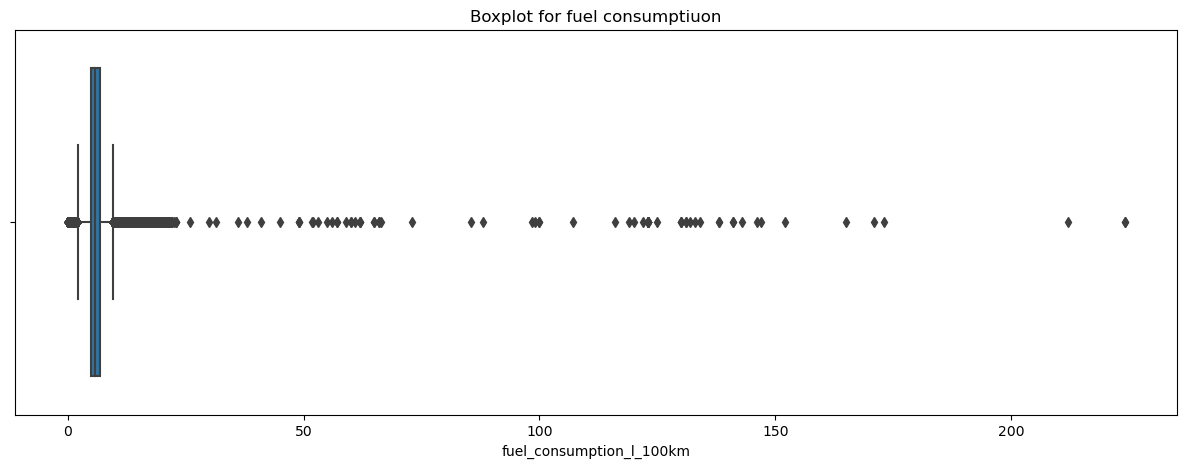

In [106]:
fig=plt.figure(figsize=(15, 5))

sns.boxplot(x=df.fuel_consumption_l_100km)
plt.title('Boxplot for fuel consumptiuon')
plt.show();

### I see a great number of outliers from both sides. First, I will check that are the outliers from the higher values. Looks like mistake of scraping.

### Examples, I see some weird data as 224, or 165, 212, Let see what are the high fuel consumptions

In [107]:
df_224=df.loc[df['fuel_consumption_l_100km']=='224']
print(df_224.head(5))
print('It looks like mistake, it is rather around 22.4, I will have to correct it')

Empty DataFrame
Columns: [brand, model, color, year, price_in_euro, power_ps, transmission_type, fuel_type, fuel_consumption_l_100km, mileage_in_km, offer_description, age]
Index: []
It looks like mistake, it is rather around 22.4, I will have to correct it


In [108]:
df_212=df.loc[df['fuel_consumption_l_100km']=='212']
print(df_212.head(5))
print('It looks like mistake, it is rather around 21.2, I will have to correct it')

Empty DataFrame
Columns: [brand, model, color, year, price_in_euro, power_ps, transmission_type, fuel_type, fuel_consumption_l_100km, mileage_in_km, offer_description, age]
Index: []
It looks like mistake, it is rather around 21.2, I will have to correct it


In [109]:
df_165=df.loc[df['fuel_consumption_l_100km']=='165']
print(df_165.head(5))
print('It looks like mistake, it is rather around 16.5, I will have to correct it')

Empty DataFrame
Columns: [brand, model, color, year, price_in_euro, power_ps, transmission_type, fuel_type, fuel_consumption_l_100km, mileage_in_km, offer_description, age]
Index: []
It looks like mistake, it is rather around 16.5, I will have to correct it


In [110]:
df_fuel_high=df.loc[df['fuel_consumption_l_100km']>20]
df_fuel_high.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, 19927 to 250736
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   brand                     138 non-null    object 
 1   model                     138 non-null    object 
 2   color                     138 non-null    object 
 3   year                      138 non-null    float64
 4   price_in_euro             138 non-null    float64
 5   power_ps                  138 non-null    float64
 6   transmission_type         138 non-null    object 
 7   fuel_type                 138 non-null    object 
 8   fuel_consumption_l_100km  138 non-null    float64
 9   mileage_in_km             138 non-null    float64
 10  offer_description         138 non-null    object 
 11  age                       138 non-null    float64
dtypes: float64(6), object(6)
memory usage: 14.0+ KB


In [111]:
# Dictionary to map incorrect values to correct ones
corrections = {
    141: 14.1,
    212: 21.2,
    224: 22.4,
    99: 9.9,
    138:13.8,
    134:13.4,
    133:13.3,
    173:17.3,
    123:12.3,
    125:12.5,
    152:15.2,
    122:12.2,
    146:14.6,
    147:14.7,
    143:14.3,
    130:13.0,
    165:16.5,
    132:13.2,
    171:17.1,
    119:11.9,
    120:12.0,
    116:11.6,
    107:10.7,
    131:13.1,
    59:5.9,
    66:6.6,
    88:8.8,
    62:6.2,
    73:7.3,
    65:6.5,
    53:5.3,
    60:6.0,
    57:5.7,
    56:5.6,
    55:5.5,
    49:4.9,
    61:6.1,
    52:5.2,
    41:4.1,
    45:4.5,
    66.4:6.6,
    99.9:10,
    85.4:8.5,
    51.8:5.2,
    98.4:9.8,
    36:3.6,
    38:3.8, 30:3, 
    
    
    
}

# Replace incorrect values with corrected ones
df['fuel_consumption_l_100km'].replace(corrections, inplace=True)


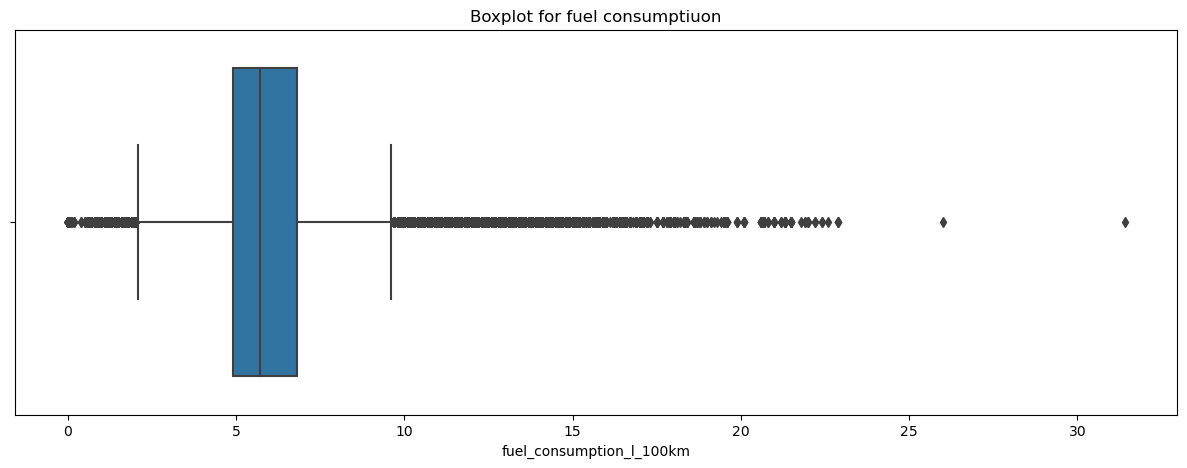

In [112]:
fig=plt.figure(figsize=(15, 5))

sns.boxplot(x=df.fuel_consumption_l_100km)
plt.title('Boxplot for fuel consumptiuon')
plt.show();

### The values of fuel_consumption higher than 9.5 are already outliers. But I do not want to delete them, they look like real values.

Text(0.5, 1.0, 'Histogram - Fuel_consumption ')

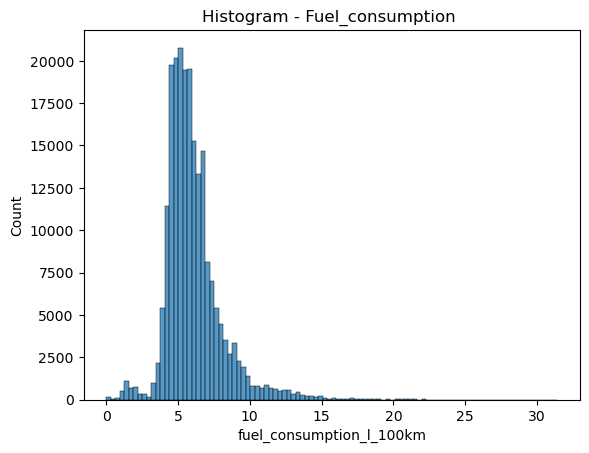

In [113]:

sns.histplot(df['fuel_consumption_l_100km'], bins=100, edgecolor='k').set_title('Histogram - fuel_consumption')
plt.title('Histogram - Fuel_consumption ')

## Another data cluster are too low values for fuel consumptions:

In [114]:
#I decided to choose the lowest board as 1.6, because there are such auto which have such a low fuel_consumption
df_fuel_low=df.loc[df['fuel_consumption_l_100km']<1.6]
df_fuel_low['fuel_consumption_l_100km'].unique()


array([0. , 1.3, 1.4, 1.5, 1. , 0.4, 0.6, 1.2, 1.1, 0.8, 0.9, 0.1, 0.7,
       0.5, 0.2])

In [115]:
df_fuel_low.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1820 entries, 964 to 251015
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   brand                     1820 non-null   object 
 1   model                     1820 non-null   object 
 2   color                     1816 non-null   object 
 3   year                      1820 non-null   float64
 4   price_in_euro             1820 non-null   float64
 5   power_ps                  1816 non-null   float64
 6   transmission_type         1820 non-null   object 
 7   fuel_type                 1820 non-null   object 
 8   fuel_consumption_l_100km  1820 non-null   float64
 9   mileage_in_km             1820 non-null   float64
 10  offer_description         1820 non-null   object 
 11  age                       1820 non-null   float64
dtypes: float64(6), object(6)
memory usage: 184.8+ KB


## At this point I save the pre-clean dataset:
    

In [116]:
df.info()
#color  still has some nan, I can remove them later
#with power ps and fuel_consumptions NaN there are some options

<class 'pandas.core.frame.DataFrame'>
Index: 242774 entries, 0 to 251078
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     242774 non-null  object 
 1   model                     242774 non-null  object 
 2   color                     242690 non-null  object 
 3   year                      242774 non-null  float64
 4   price_in_euro             242774 non-null  float64
 5   power_ps                  242658 non-null  float64
 6   transmission_type         242774 non-null  object 
 7   fuel_type                 242774 non-null  object 
 8   fuel_consumption_l_100km  215556 non-null  float64
 9   mileage_in_km             242774 non-null  float64
 10  offer_description         242774 non-null  object 
 11  age                       242774 non-null  float64
dtypes: float64(6), object(6)
memory usage: 24.1+ MB


In [117]:
df.head()

,brand,model,color,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km,offer_description,age
0,alfa-romeo,Alfa Romeo GTV,red,1995.0,1300.0,201.0,Manual,Petrol,10.9,160500.0,2.0 V6 TB,29.0
1,alfa-romeo,Alfa Romeo 164,black,1995.0,24900.0,260.0,Manual,Petrol,NaN,190000.0,"Q4 Allrad, 3.2L GTA",29.0
3,alfa-romeo,Alfa Romeo Spider,black,1995.0,4900.0,150.0,Manual,Petrol,9.5,189500.0,2.0 16V Twin Spark L,29.0
4,alfa-romeo,Alfa Romeo 164,red,1996.0,17950.0,179.0,Manual,Petrol,7.2,96127.0,"3.0i Super V6, absoluter Topzustand !",28.0
5,alfa-romeo,Alfa Romeo Spider,red,1996.0,7900.0,150.0,Manual,Petrol,9.5,47307.0,2.0 16V Twin Spark,28.0


In [118]:
import csv 

#the save the file in csv
df.to_csv('auto_data_pre_cleaned_16_10_2024.csv', sep=',',index=False,  encoding='UTF8')  

## I see several ways how to handel these data, either I bring them to Nans and then I will replace them to average values for this model (or maybe by the mode), or it is possible to consider to drop them from the dataset (and drop other nan as well ,  but they are around 27000 for fuel consumption - this is something to consider)

In [119]:
#First way - only fuel consumtion higher than 1.6 are in dataset: 
#new dataframe df_drop
df_drop = df[df['fuel_consumption_l_100km'] >= 1.6]

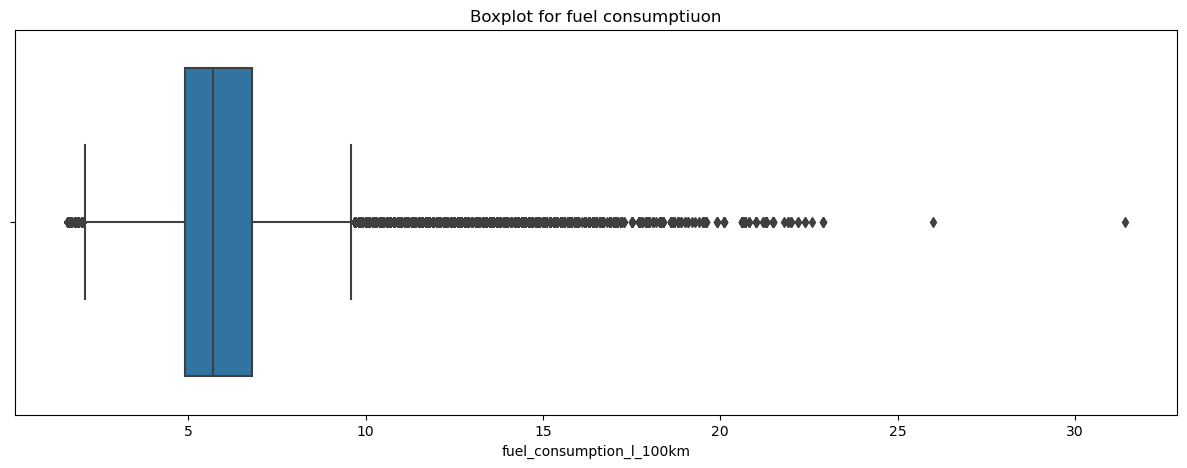

In [120]:
#distribution
fig=plt.figure(figsize=(15, 5))

sns.boxplot(x=df_drop.fuel_consumption_l_100km)
plt.title('Boxplot for fuel consumptiuon')
plt.show();

In [121]:
df_drop = df_drop.dropna(subset=['power_ps'])



In [135]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213668 entries, 0 to 251076
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     213668 non-null  object 
 1   model                     213668 non-null  object 
 2   color                     213596 non-null  object 
 3   year                      213668 non-null  float64
 4   price_in_euro             213668 non-null  float64
 5   power_ps                  213668 non-null  float64
 6   transmission_type         213668 non-null  object 
 7   fuel_type                 213668 non-null  object 
 8   fuel_consumption_l_100km  213668 non-null  float64
 9   mileage_in_km             213668 non-null  float64
 10  offer_description         213668 non-null  object 
 11  age                       213668 non-null  float64
dtypes: float64(6), object(6)
memory usage: 21.2+ MB


In [136]:
#the save the file in csv: Dropped dataset
df_drop.to_csv('auto_data_cleaned_drop__15_10_2024.csv', sep=',',index=False,  encoding='UTF8')   

### Second way, I simply replace too low values with mode for the model of the year or with the mean (if it is not possible to find a mode)


In [124]:
# First step: Replace values less than 1.6 with NaN
df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].apply(lambda x: np.nan if x < 1.6 else x)

# Second step: Group by model and year, and replace NaN values with the mode for that group
df['fuel_consumption_l_100km'] = df.groupby(['model', 'year'])['fuel_consumption_l_100km'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.mean())  # Fallback to mean if mode doesn't exist
)

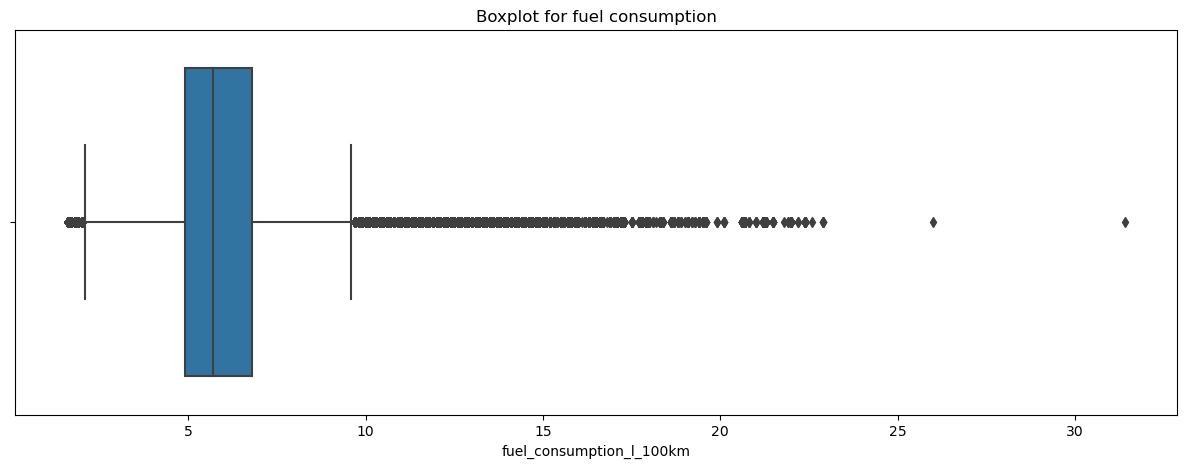

In [125]:
#distribution
fig=plt.figure(figsize=(15, 5))

sns.boxplot(x=df.fuel_consumption_l_100km)
plt.title('Boxplot for fuel consumption')
plt.show();

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242774 entries, 0 to 251078
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     242774 non-null  object 
 1   model                     242774 non-null  object 
 2   color                     242690 non-null  object 
 3   year                      242774 non-null  float64
 4   price_in_euro             242774 non-null  float64
 5   power_ps                  242658 non-null  float64
 6   transmission_type         242774 non-null  object 
 7   fuel_type                 242774 non-null  object 
 8   fuel_consumption_l_100km  238302 non-null  float64
 9   mileage_in_km             242774 non-null  float64
 10  offer_description         242774 non-null  object 
 11  age                       242774 non-null  float64
dtypes: float64(6), object(6)
memory usage: 24.1+ MB


### The third option: to get rid off the outliers (or extreme values) for price_in_euro and mileage:

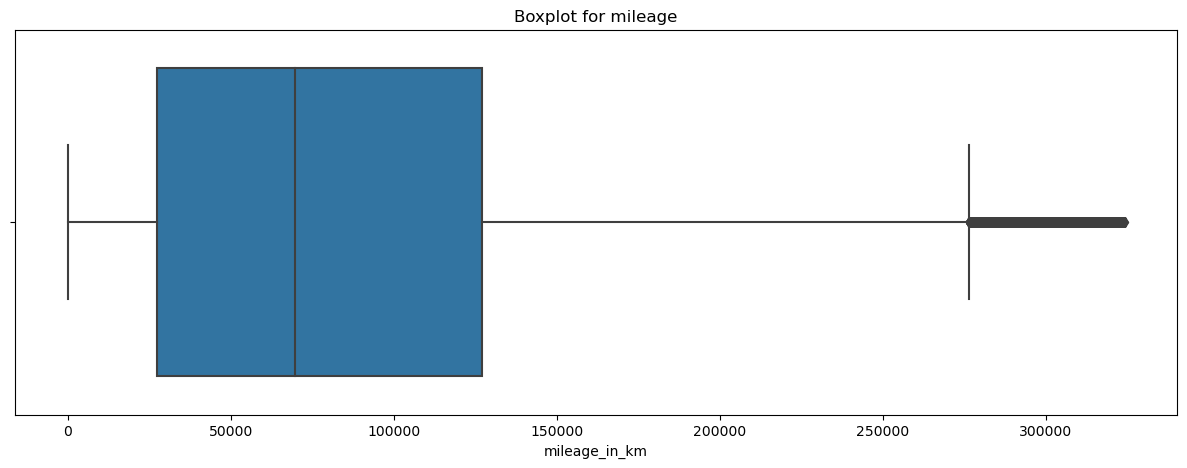

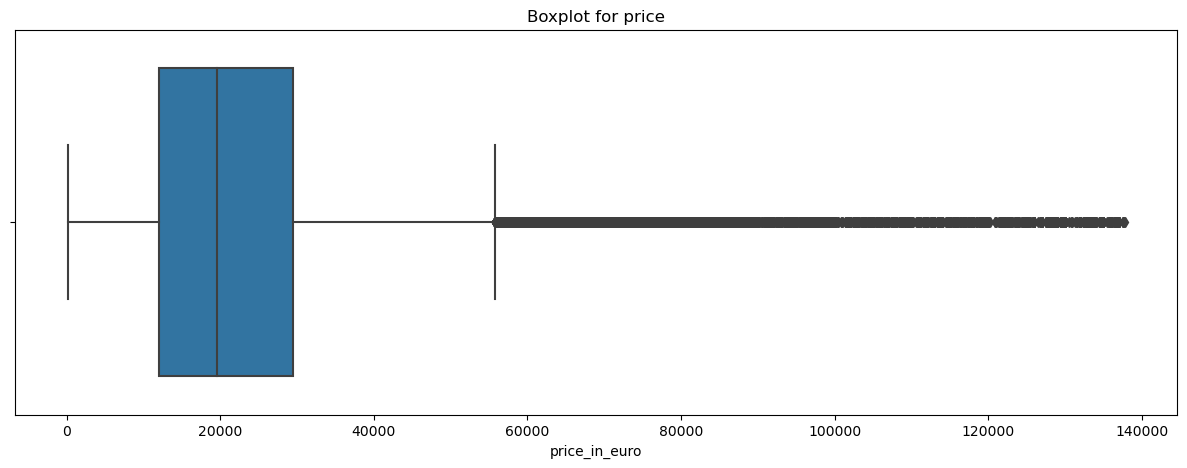

In [127]:
# Remove outliers using Z-score for price and mileage
df_clean = df[(np.abs(stats.zscore(df['price_in_euro'])) < 3)]  # 3 is the standard threshold for outliersb
df_clean = df_clean[(np.abs(stats.zscore(df_clean['mileage_in_km'])) < 3)]  # Do the same for mi


#distribution
fig=plt.figure(figsize=(15, 5))

sns.boxplot(x=df_clean.mileage_in_km)
plt.title('Boxplot for mileage')
plt.show()

#distribution
fig=plt.figure(figsize=(15, 5))

sns.boxplot(x=df_clean.price_in_euro)
plt.title('Boxplot for price')
plt.show()

In [128]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 237659 entries, 0 to 251078
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     237659 non-null  object 
 1   model                     237659 non-null  object 
 2   color                     237575 non-null  object 
 3   year                      237659 non-null  float64
 4   price_in_euro             237659 non-null  float64
 5   power_ps                  237554 non-null  float64
 6   transmission_type         237659 non-null  object 
 7   fuel_type                 237659 non-null  object 
 8   fuel_consumption_l_100km  233317 non-null  float64
 9   mileage_in_km             237659 non-null  float64
 10  offer_description         237659 non-null  object 
 11  age                       237659 non-null  float64
dtypes: float64(6), object(6)
memory usage: 23.6+ MB


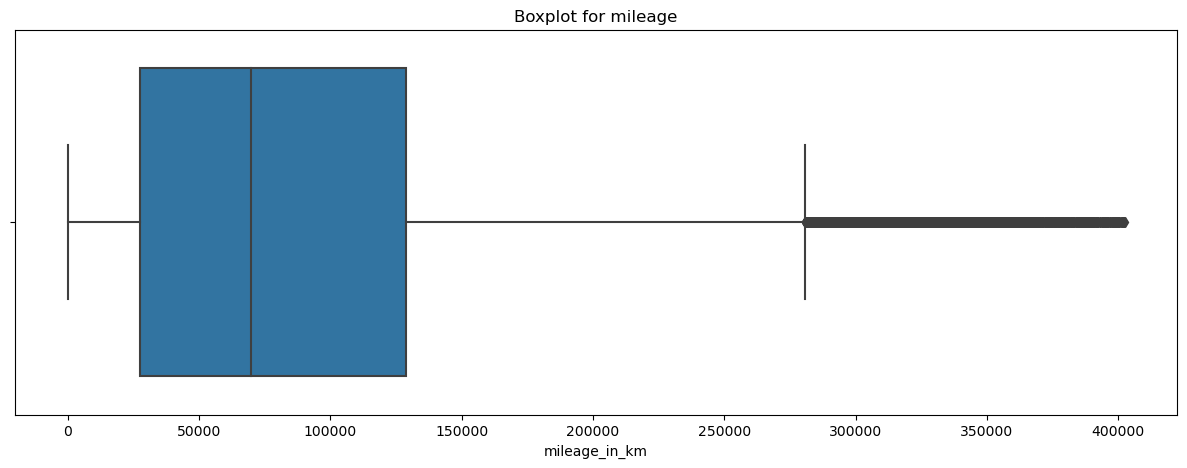

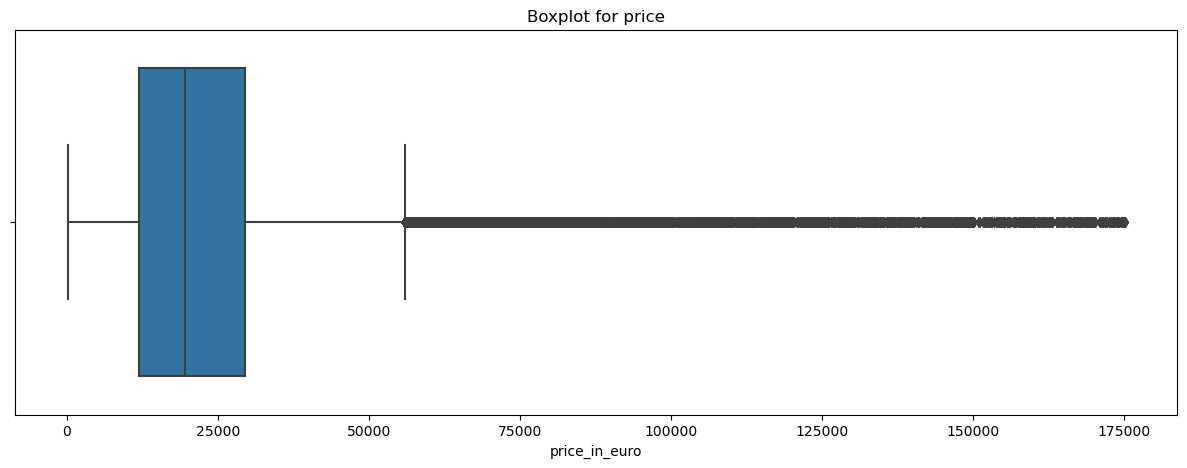

In [129]:
# I increase the threshold to keep more expensive and luxury autos in the dataset
df_clean = df[(np.abs(stats.zscore(df['price_in_euro'])) < 4)]  # 4 is the higer threshold for outliers
df_clean = df_clean[(np.abs(stats.zscore(df_clean['mileage_in_km'])) < 4)]  # Do the same for mileage


#distribution
fig=plt.figure(figsize=(15, 5))

sns.boxplot(x=df_clean.mileage_in_km)
plt.title('Boxplot for mileage')
plt.show()

#distribution
fig=plt.figure(figsize=(15, 5))

sns.boxplot(x=df_clean.price_in_euro)
plt.title('Boxplot for price')
plt.show()

In [130]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240352 entries, 0 to 251078
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     240352 non-null  object 
 1   model                     240352 non-null  object 
 2   color                     240268 non-null  object 
 3   year                      240352 non-null  float64
 4   price_in_euro             240352 non-null  float64
 5   power_ps                  240246 non-null  float64
 6   transmission_type         240352 non-null  object 
 7   fuel_type                 240352 non-null  object 
 8   fuel_consumption_l_100km  235928 non-null  float64
 9   mileage_in_km             240352 non-null  float64
 10  offer_description         240352 non-null  object 
 11  age                       240352 non-null  float64
dtypes: float64(6), object(6)
memory usage: 23.8+ MB


In [131]:
df = df.dropna(subset=['fuel_consumption_l_100km'])


In [132]:
model_mean_power = df.groupby('model')['power_ps'].transform('mean')

# Step 2: Fill NaNs in 'fuel_consumption' with the calculated mean for each model
df['power_ps'] = df['power_ps'].fillna(model_mean_power)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 238302 entries, 0 to 251078
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     238302 non-null  object 
 1   model                     238302 non-null  object 
 2   color                     238221 non-null  object 
 3   year                      238302 non-null  float64
 4   price_in_euro             238302 non-null  float64
 5   power_ps                  238302 non-null  float64
 6   transmission_type         238302 non-null  object 
 7   fuel_type                 238302 non-null  object 
 8   fuel_consumption_l_100km  238302 non-null  float64
 9   mileage_in_km             238302 non-null  float64
 10  offer_description         238302 non-null  object 
 11  age                       238302 non-null  float64
dtypes: float64(6), object(6)
memory usage: 23.6+ MB


Here we save the cleaned and processed data set:

In [134]:
import csv 

#the save the file in csv
df.to_csv('auto_data_cleaned_16_09_2024.csv', sep=',',index=False,  encoding='UTF8')   

#and this will be the full dataset (alterantive dataset will be the dropped dataset)